> __Код делал в Google Colab, тк некотоыре функции arviz и pymc из интернета, которые хотел применить к решению не работали в ноутбуке. В колабе все работает без ошибок!__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

sns.set_style("whitegrid")

In [2]:
train_data = pd.read_csv('regression/train_reg.csv')
test_data = pd.read_csv('regression/test_reg.csv')

In [3]:
train_data.head()

,x,y
0,0.415709,2.267527
1,2.078132,5.761260
2,6.152402,17.237352
3,7.064143,18.693992
4,8.140977,23.252819


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

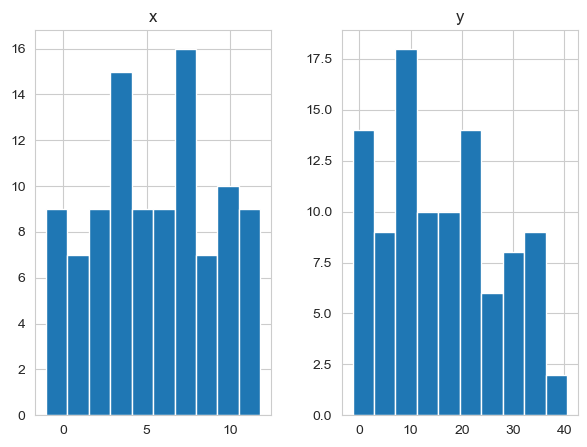

In [4]:
train_data.hist(figsize = (7,5))

/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/stats/density_utils.py:957: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "histogram" failed type inference due to: non-precise type pyobject
During: typing of argument at /Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/stats/density_utils.py (957)

File "../../../../../../../anaconda3/lib/python3.11/site-packages/arviz/stats/density_utils.py", line 957:
def _normalize_angle(x, 

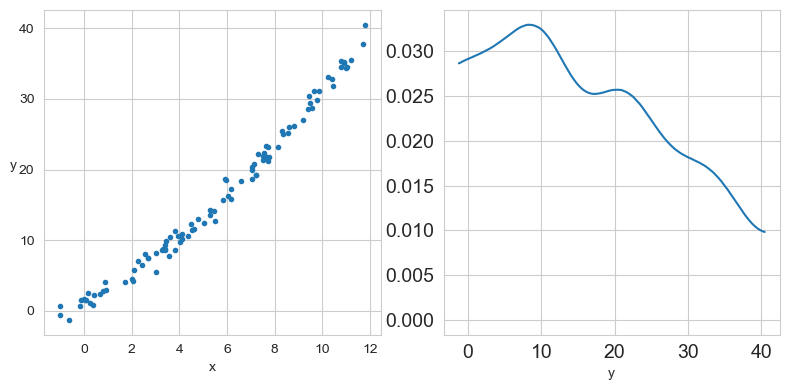

In [5]:
_, ax = plt.subplots(1,2, figsize=(8, 4))
ax[0].plot(train_data.x, train_data.y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
az.plot_kde(train_data.y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

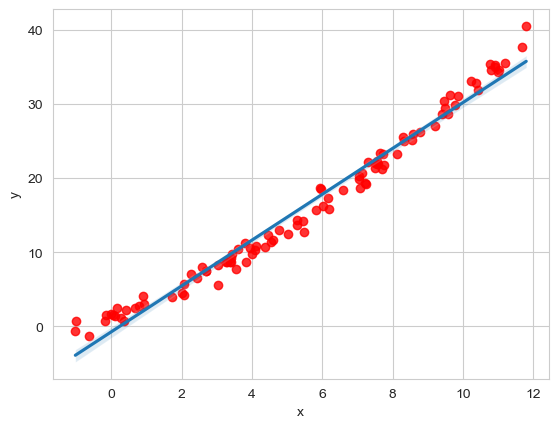

In [6]:
ax = sns.regplot(x = 'x' , y = 'y', data = train_data, fit_reg= True, scatter_kws= {'color':'red'})

In [7]:
columns = train_data.columns[:-1]
x = train_data.x.values
x_c = (x - x.mean())/x.std()
y = train_data.y.values

array([[<Axes: title={'center': '0'}>]], dtype=object)

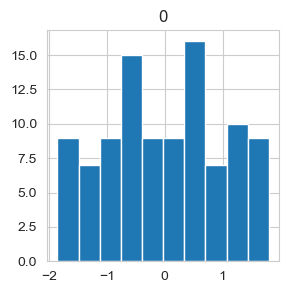

In [8]:
pd.DataFrame(x_c).hist(figsize = (3,3))

In [9]:
with pm.Model() as model_1:

    x_train = pm.Data('x_train', x_c)

    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=1)
    ε = pm.HalfNormal('ε', 10)
    μ = pm.Deterministic('μ', α + β * x_train)
    y_pred = pm.Normal('y_pred', mu=μ, sigma=ε, observed=y)
    trace_1 = pm.sample(1000, chains=4, cores=4)

/Users/imachome/anaconda3/lib/python3.11/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β, ε]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.
/Users/imachome/anaconda3/lib/python3.11/site-packages/arviz/utils.py:185: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


In [10]:
az.summary(trace_1, var_names = ['α', 'β', 'ε'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,16.199,0.168,15.901,16.546,0.002,0.002,5941.0,3173.0,1.0
β,10.536,0.178,10.197,10.867,0.002,0.002,5149.0,3006.0,1.0
ε,1.727,0.135,1.490,1.989,0.002,0.001,4400.0,2688.0,1.0


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

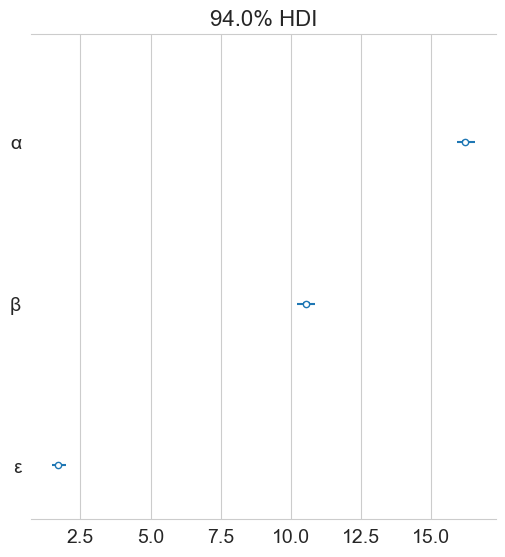

In [11]:
az.plot_forest(trace_1, var_names=['α', 'β', 'ε'], combined=True)

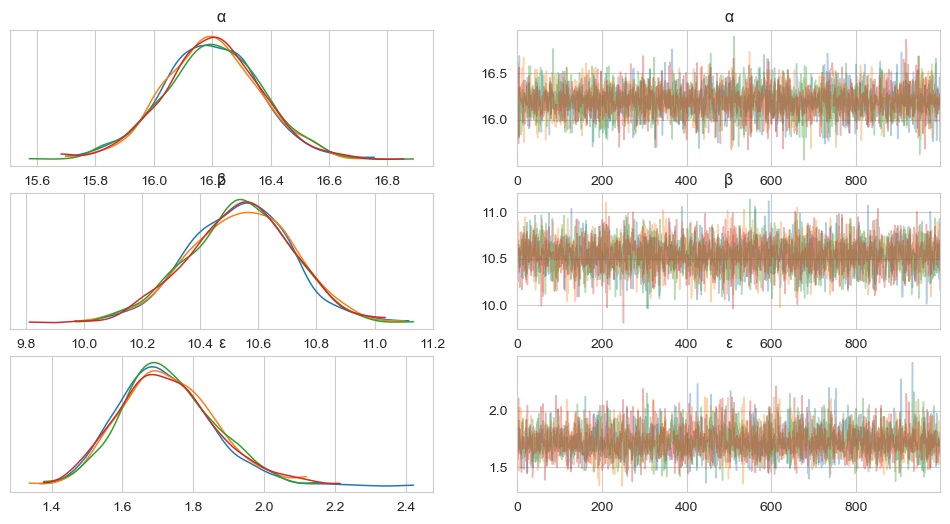

In [12]:
az.plot_trace(trace_1, var_names=['α', 'β', 'ε'], compact= False);

<Axes: xlabel='α', ylabel='β'>

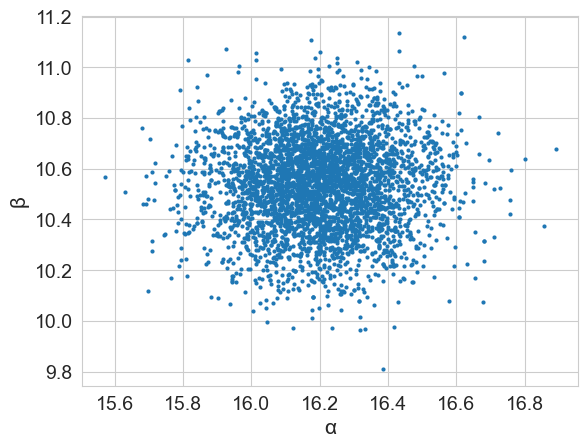

In [13]:
az.plot_pair(trace_1, var_names=['α', 'β'])
# видим, что нет выраженной корреляции между параметрами

array([[<Axes: title={'center': 'α\n0'}>,
        <Axes: title={'center': 'α\n1'}>,
        <Axes: title={'center': 'α\n2'}>],
       [<Axes: title={'center': 'α\n3'}>,
        <Axes: title={'center': 'β\n0'}>,
        <Axes: title={'center': 'β\n1'}>],
       [<Axes: title={'center': 'β\n2'}>,
        <Axes: title={'center': 'β\n3'}>,
        <Axes: title={'center': 'ε\n0'}>],
       [<Axes: title={'center': 'ε\n1'}>,
        <Axes: title={'center': 'ε\n2'}>,
        <Axes: title={'center': 'ε\n3'}>]], dtype=object)

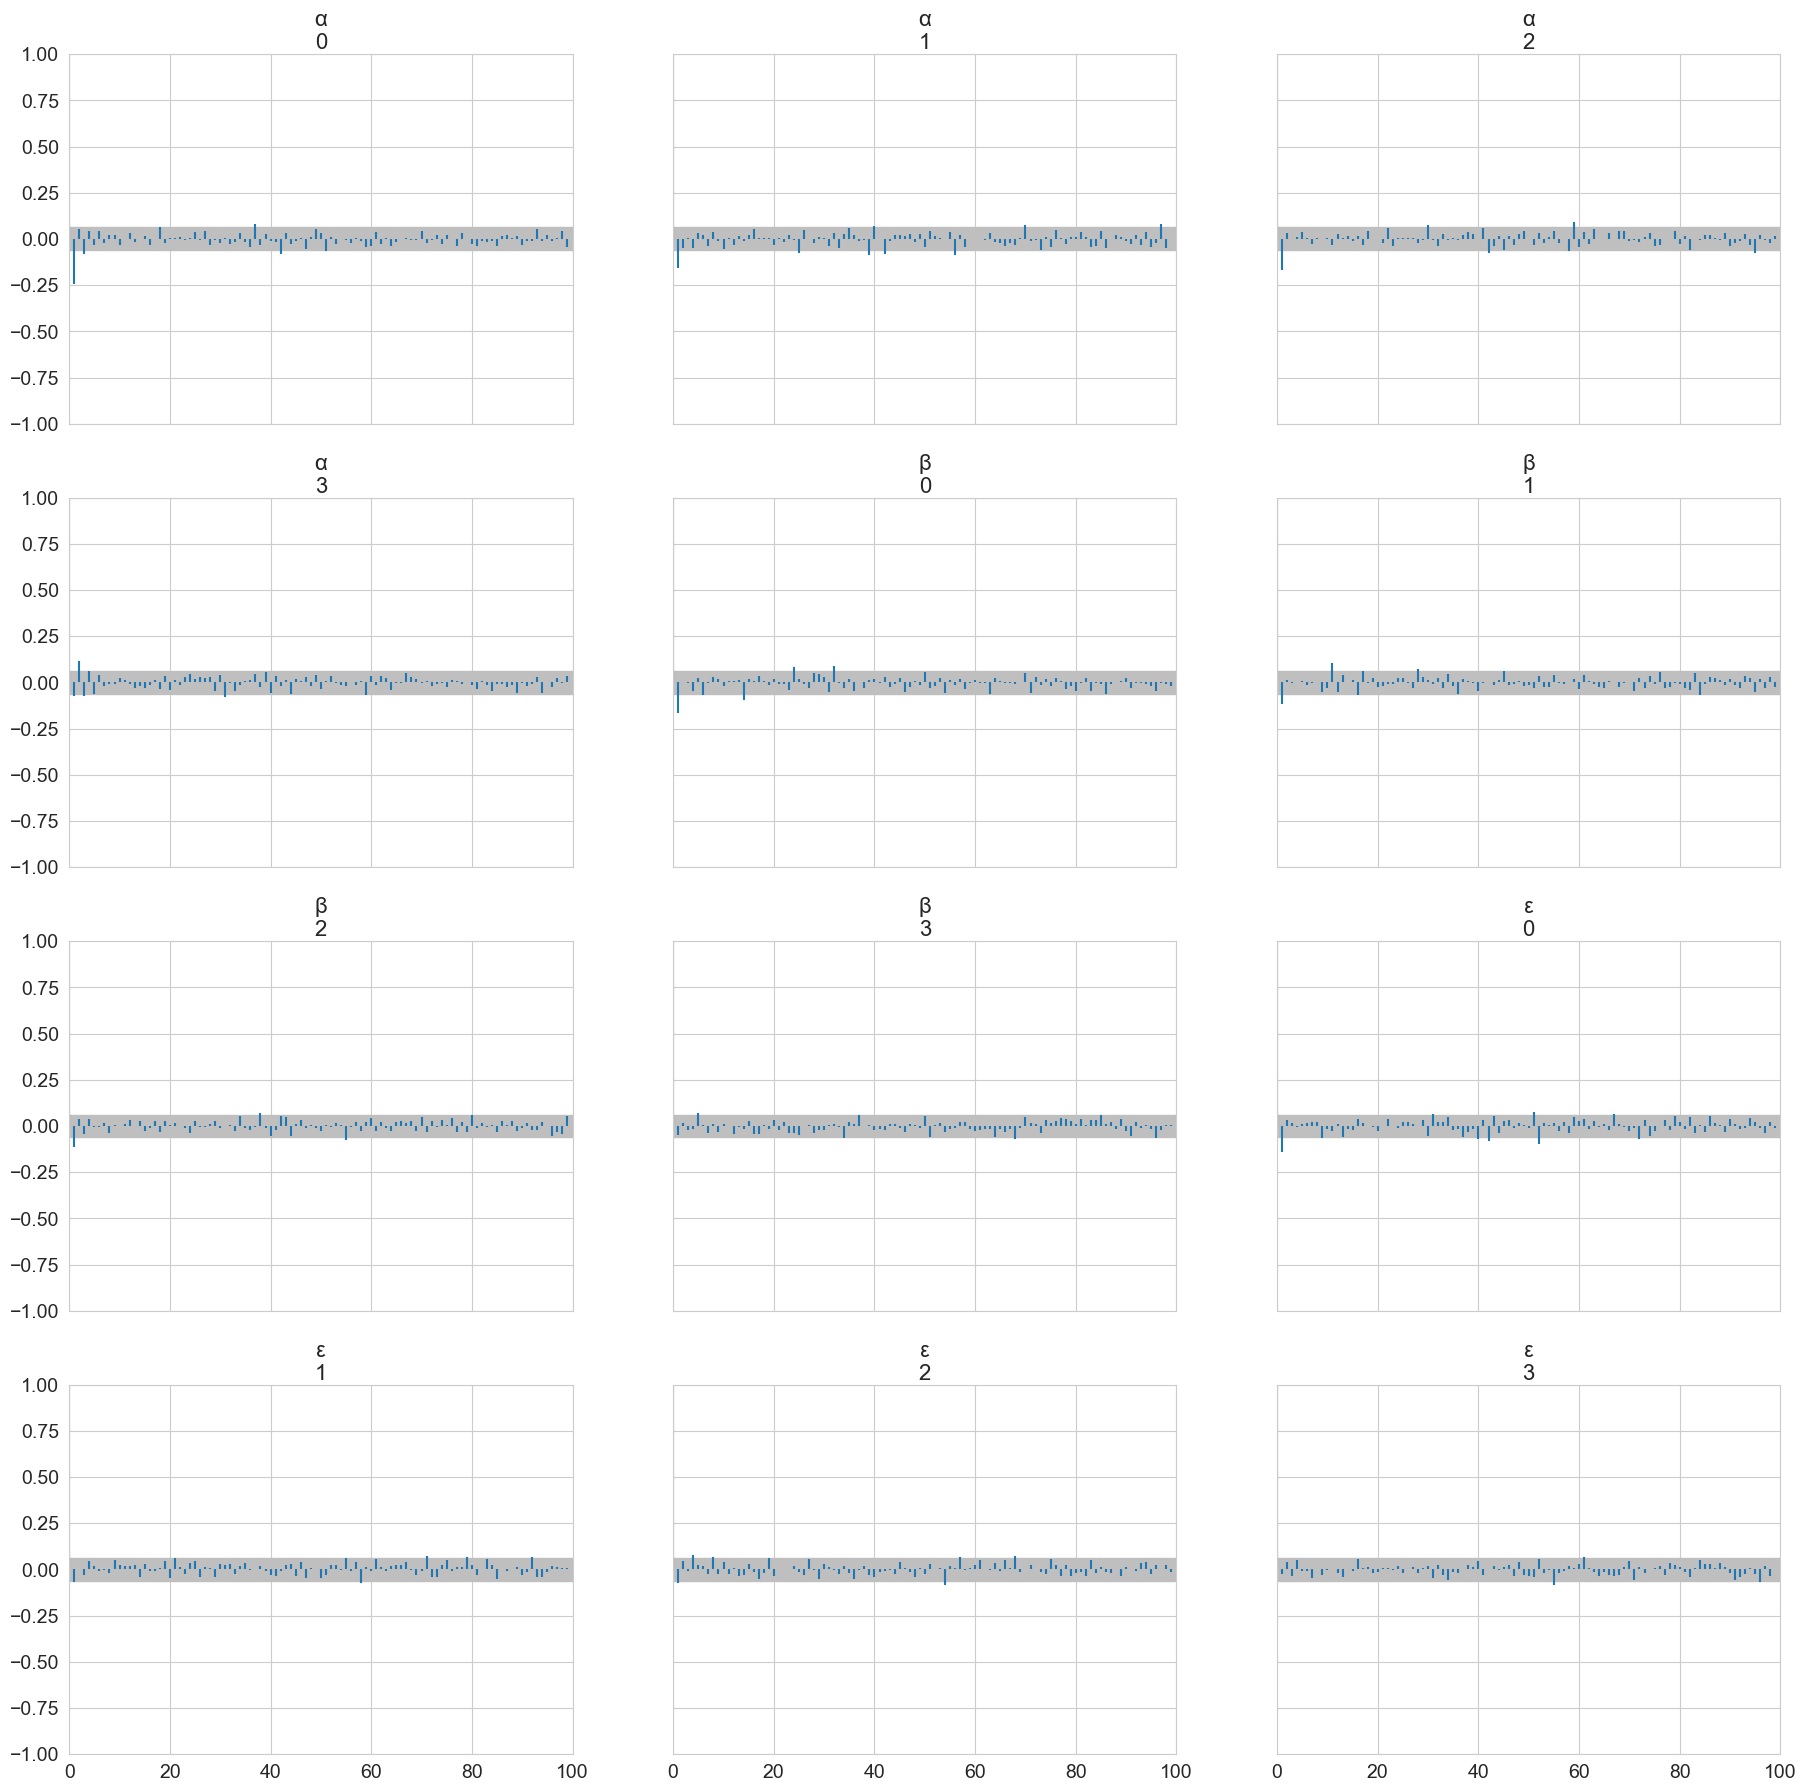

In [14]:
az.plot_autocorr(trace_1, ['α', 'β', 'ε'])
# Видно, что сильных выбросов нету, которые выходят за интервал
# В самом начале есть выходы за диапазон, но это однократно и на лекции были такие же случаи

In [15]:
y_pred_val = trace_1.posterior['μ'].mean(axis=0).values.T
y_pred_train = [y_pred_val[idx].mean() for idx in range(y_pred_val.shape[0])]

Всего трасс :  4000
MSE : 2.842051763869753
MAPE: 0.28158249057691254


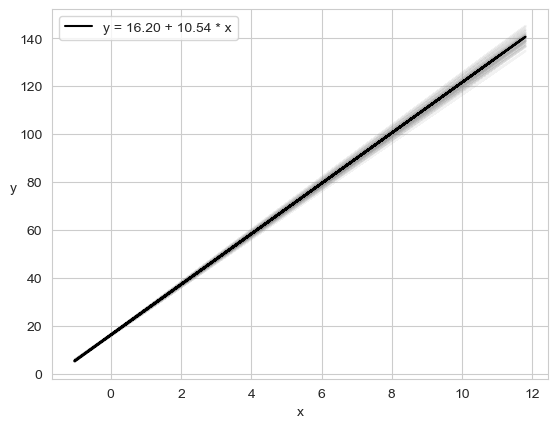

In [16]:
posterior_g = az.extract(trace_1)


alpha_m = posterior_g['α'].mean().item()
beta_m  = posterior_g['β'].mean().item()

print("Всего трасс : ", posterior_g.sample.size)
print('MSE :', mean_squared_error(y,y_pred_train))
print('MAPE:',mean_absolute_percentage_error(y,y_pred_train))

draws = range(0, posterior_g.sample.size, 100)

plt.plot(x, posterior_g['α'][draws].values +
                 posterior_g['β'][draws].values * x[:,None], c='gray', alpha=0.1)

plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()

In [17]:
x_test = test_data.values
x_test_c = x_test - x_test.mean()

In [18]:
# 1 вариант решения, который можно подсмотреть
# здесь https://www.pymc.io/projects/examples/en/latest/howto/data_container.html#data_container
# данный кусок не выполнялся в ноутбуке, поэтому перешел в колаб
# Не знаю можно ли такое использовать, тк pymc3 такое реализуется для предсказаний, а вот используя pymc2 не знаю, но работает
# если такое использовать не разрешено, то дальше есть 2 вариант решения
# иначе, думаю, что брать лучше ответ от сюда, тк генерируется много значений, которые пытаются описать целевую переменную
# возможно, что эти ответы будут ближе к y_true

with model_1:
    x_test = pm.Data('x_test', x_test_c)

    ypred_test = pm.Normal('ypred_test', mu = α + β * x_test, sigma = ε, observed=None)

    ppc_test = pm.sample_posterior_predictive(trace_1, var_names=['ypred_test'])

/Users/imachome/anaconda3/lib/python3.11/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Sampling: [ypred_test]


In [19]:
y_pred_massiv = ppc_test.posterior_predictive['ypred_test'].values.T

In [20]:
y_pred_test_ppc = [y_pred_massiv[0][idx].mean() for idx in range(y_pred_massiv.shape[1])]

In [21]:
# 2 способ решения: построить самостоятельно линейную модель и сделать предсказания таким образом:
α_coef = trace_1.posterior['α'].mean(("chain", "draw")).values
β_coef = trace_1.posterior["β"].mean(("chain", "draw")).values

y_pred_test = α_coef + β_coef * x_test_c

In [22]:
# Для наглядного представления предсказаний
pd.DataFrame(y_pred_test).head()

,0
0,21.590065
1,-12.714087
2,-47.739677
3,63.499409
4,35.397955


In [23]:
# Предсказанные классы, оба массива с предсказаниями практически совпадают, поэтому можно взять любой, ошибка не будет большой, я думаю
# Если разрешено делать 1 способом, то лучше взять 1, если нет, то 2

# список с предсказаниями  1 способом
y_pred_test_ppc
# список с предсказаниями 2 способом
y_pred_test

# Коэффициенты модели
print('Коэффициенты α: {alpha} и β: {beta}'.format(alpha = round(float(α_coef),3), beta = round(float(β_coef),3)))

Коэффициенты α: 16.199 и β: 10.536


In [24]:
from sklearn.metrics import mean_squared_error
y_true = pd.read_csv('test_Y_true_reg.csv')
mean_squared_error(y_true, y_pred_test_ppc)

594.2953985201146

In [25]:
from sklearn.metrics import mean_squared_error
y_true = pd.read_csv('test_Y_true_reg.csv')
mean_squared_error(y_true, y_pred_test)

594.399479708742

In [26]:
(594.2953985201146+594.399479708742)/2

594.3474391144283